# IS 362 – Week 12/13 Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Here below is the website where the files for the data originated.

Source: https://archive.ics.uci.edu/dataset/73/mushroom

## Reading and Importing the Files

The following blocks of code below are used to read the contents of the files.

In [2]:
open('agaricus-lepiota.data', 'r').readlines()

['p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\n',
 'e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\n',
 'e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\n',
 'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\n',
 'e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\n',
 'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\n',
 'e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\n',
 'e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\n',
 'p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\n',
 'e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\n',
 'e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\n',
 'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\n',
 'e,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\n',
 'p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\n',
 'e,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g\n',
 'e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u\n',
 'e,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\n',
 'p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g\n',
 'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u\n',
 'p,x,s,n,t,

In [3]:
open('agaricus-lepiota.names', 'r').readlines()

['1. Title: Mushroom Database\n',
 '\n',
 '2. Sources: \n',
 '    (a) Mushroom records drawn from The Audubon Society Field Guide to North\n',
 '        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred\n',
 '        A. Knopf\n',
 '    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n',
 '    (c) Date: 27 April 1987\n',
 '\n',
 '3. Past Usage:\n',
 '    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational\n',
 '       Adjustment (Technical Report 87-19).  Doctoral disseration, Department\n',
 '       of Information and Computer Science, University of California, Irvine.\n',
 '       --- STAGGER: asymptoted to 95% classification accuracy after reviewing\n',
 '           1000 instances.\n',
 '    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity\n',
 '       and Coverage in Incremental Concept Learning. In Proceedings of \n',
 '       the 5th International Conference on Machine Learning, 73-79.\n',
 '       Ann Arbor, Mic

In the 'names' file, it describes the attributes each represented by letters, and some of them have "\" in them. To create the DataFrame, considering how the series/columns are separated by commas on each row, I would have to use the "read_csv" method. As I can choose the columns I want to include in the DataFrame, I would have to use the "usecols" method to import those specific columns.

In [4]:
fungi = pd.read_csv('agaricus-lepiota.data', usecols = [0, 1, 3, 5, 20, 22], header=None)
fungi

,0,1,3,5,20,22
0,p,x,n,p,k,u
1,e,x,y,a,n,g
2,e,b,w,l,n,m
3,p,x,w,p,k,u
4,e,x,g,n,n,g
...,...,...,...,...,...,...
8119,e,k,n,n,b,l
8120,e,x,n,n,b,l
8121,e,f,n,n,b,l
8122,p,k,n,y,w,l


In [5]:
attributes = ['Edibility', 'Cap Shape', 'Cap Color', 'Odor', 'Spore Print Color','Habitat']
fungi.columns = attributes

fungi

,Edibility,Cap Shape,Cap Color,Odor,Spore Print Color,Habitat
0,p,x,n,p,k,u
1,e,x,y,a,n,g
2,e,b,w,l,n,m
3,p,x,w,p,k,u
4,e,x,g,n,n,g
...,...,...,...,...,...,...
8119,e,k,n,n,b,l
8120,e,x,n,n,b,l
8121,e,f,n,n,b,l
8122,p,k,n,y,w,l


To convert all of the objects in the first column to numeric values, I had to use the replace function convert the **"e"s** to 0 and the **"p"s** to 1.

In [6]:
fungi['Edibility'].replace(['e','p'], [0, 1], inplace=True)
fungi.dtypes

Edibility             int64
Cap Shape            object
Cap Color            object
Odor                 object
Spore Print Color    object
Habitat              object
dtype: object

We can see that the data type has been converted to numeric values (being either "int64" or "float64).

Now let's see the changes on the DataFrame itself.

In [7]:
fungi

,Edibility,Cap Shape,Cap Color,Odor,Spore Print Color,Habitat
0,1,x,n,p,k,u
1,0,x,y,a,n,g
2,0,b,w,l,n,m
3,1,x,w,p,k,u
4,0,x,g,n,n,g
...,...,...,...,...,...,...
8119,0,k,n,n,b,l
8120,0,x,n,n,b,l
8121,0,f,n,n,b,l
8122,1,k,n,y,w,l


Apparently, this is because in the downstream processing in Project 4 using 
**scikit-learn** requires that values be stored as numerics. So that particular series of data ("Edibility" column) will be stored that way, for now.

Though I will convert those values to their worded characteristic as listed in the description file in the following code cells.

### Changing the values in the columns to words

In the description (.names) file, each of the singular letters represent a worded attribute for the fungi listed. Here, I converted those letters to the words they are meant to represent, the characteristics of the fungi.

In [8]:
fungi['Cap Shape'].replace(['b', 'c', 'x', 'f', 'k', 's'], 
                           ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'],
                          inplace=True)
fungi['Cap Color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], 
                           ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 
                            'red', 'white', 'yellow'], inplace=True)
fungi['Odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], 
                      ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 
                       'pungent', 'spicy'], inplace=True)
fungi['Spore Print Color'].replace(['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], 
                                   ['black', 'brown', 'buff', 'chocolate', 'green', 
                                    'orange', 'purple', 'white', 'yellow'], inplace=True)
fungi['Habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], 
                         ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste',
                          'woods'], inplace=True)

# For the sake of having proper labels on the Seaborn Plot, I am converting the numeric 
# values into the word they represent. 0 = Edible, 1 = Poisonous
fungi['Edibility'].replace([0, 1], ['Edible', 'Poisonous'], inplace=True)
fungi

,Edibility,Cap Shape,Cap Color,Odor,Spore Print Color,Habitat
0,Poisonous,convex,brown,pungent,black,urban
1,Edible,convex,yellow,almond,brown,grasses
2,Edible,bell,white,anise,brown,meadows
3,Poisonous,convex,white,pungent,black,urban
4,Edible,convex,gray,none,brown,grasses
...,...,...,...,...,...,...
8119,Edible,knobbed,brown,none,buff,leaves
8120,Edible,convex,brown,none,buff,leaves
8121,Edible,flat,brown,none,buff,leaves
8122,Poisonous,knobbed,brown,fishy,white,leaves


## Distribution of Column Data

### Count/Distribution of Edible and Poisonous Fungi

In [9]:
edible_count = fungi['Edibility'].value_counts()
EP = pd.DataFrame(edible_count)
EP

,Edibility
Edible,4208
Poisonous,3916


<AxesSubplot:title={'center':'Distribution of Fungi Edibility'}, ylabel='Count'>

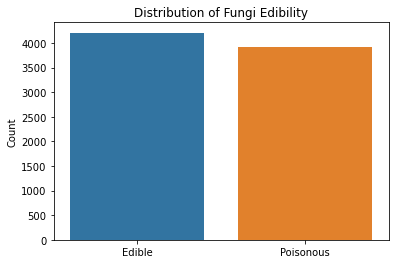

In [10]:
edibility = sns.barplot(data=EP, x=EP.index, y=EP['Edibility'])
edibility.set(ylabel='Count',
              title='Distribution of Fungi Edibility')
edibility

##### Observations

Out of all of the 8,124 fungi recorded in the dataset, roughly half of them are either poisonous or edible. More precisely, 4,208 of them **edible** while the remaining 3,916 are **poisonous**.

### Distribution of Other Fungi Traits

#### Cap Shape

In [11]:
fungi['Cap Shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: Cap Shape, dtype: int64

In [12]:
fungi.value_counts(['Edibility', 'Cap Shape'])

Edibility  Cap Shape
Edible     convex       1948
Poisonous  convex       1708
Edible     flat         1596
Poisonous  flat         1556
           knobbed       600
Edible     bell          404
           knobbed       228
Poisonous  bell           48
Edible     sunken         32
Poisonous  conical         4
dtype: int64

<AxesSubplot:title={'center':'Distribution of Cap Shape'}, xlabel='Cap Shape', ylabel='Count'>

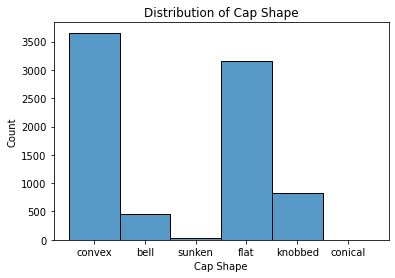

In [13]:
dist_cap_shape = sns.histplot(fungi['Cap Shape'])
dist_cap_shape.set(title = 'Distribution of Cap Shape')
dist_cap_shape

##### Observation

Most of the fungi recorded would either have a **convex** or **flat** cap shape. A majority of the fungi have convex shapes, with a count of 3,656, and flat having a count of 3,152 makes it the second highest; on the other hand, conical caps have the smallest count among the dataset, with a count of 4.

Roughly half of the flat cap fungi are either poisonous or edible.

#### Cap Color

In [14]:
fungi['Cap Color'].value_counts()

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: Cap Color, dtype: int64

In [15]:
fungi.value_counts(['Edibility', 'Cap Color'])

Edibility  Cap Color
Edible     brown        1264
           gray         1032
Poisonous  brown        1020
           red           876
           gray          808
Edible     white         720
Poisonous  yellow        672
Edible     red           624
           yellow        400
Poisonous  white         320
           buff          120
           pink           88
Edible     pink           56
           buff           48
           cinnamon       32
           purple         16
           green          16
Poisonous  cinnamon       12
dtype: int64

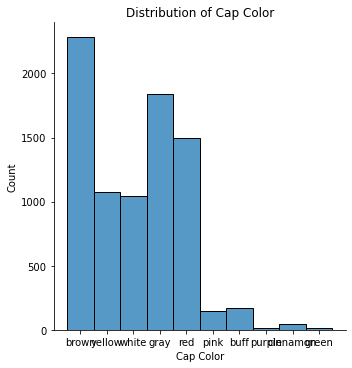

In [16]:
dist_cap_color = sns.displot(fungi['Cap Color'])
dist_cap_color.set(title = 'Distribution of Cap Color')
dist_cap_color

##### Observations

A majority of the fungi recorded have a **brown** cap color, with a count of 2,284, with second most color being **gray**, with a count of 1,840. **Purple** and **green** cap colors have the smallest counts among the dataset, both having a count of 16; interestingly, those specific fungi are edible.

#### Odor

In [17]:
fungi['Odor'].value_counts()

none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: Odor, dtype: int64

In [18]:
fungi.value_counts(['Edibility', 'Odor'])

Edibility  Odor    
Edible     none        3408
Poisonous  foul        2160
           fishy        576
           spicy        576
Edible     almond       400
           anise        400
Poisonous  pungent      256
           creosote     192
           none         120
           musty         36
dtype: int64

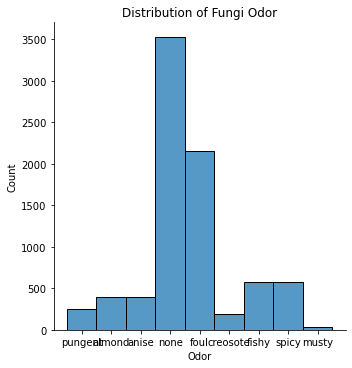

In [19]:
dist_odor = sns.displot(fungi['Odor'])
dist_odor.set(title = 'Distribution of Fungi Odor')
dist_odor

##### Observations

A majority of the fungi recorded have a **do not** have an odor (**none**), with a count of 3,528, with **foul** odor being the second most common occurrence in the dataset, with a count of 2,160. Out of the fungi with no odor, only 3,408 are edible. 

**Fishy** and **spicy** odors all have the same count of 576, and all those fungi are poisonous.

Though the least occcurring odor for the fungi is "**musty**," having only 36 occurrences in the dataset, and they're all poisonous.

#### Spore Print Color

In [20]:
fungi['Spore Print Color'].value_counts()

white        2388
brown        1968
black        1872
chocolate    1632
green          72
purple         48
orange         48
yellow         48
buff           48
Name: Spore Print Color, dtype: int64

In [21]:
fungi.value_counts(['Edibility', 'Spore Print Color'])

Edibility  Spore Print Color
Poisonous  white                1812
Edible     brown                1744
           black                1648
Poisonous  chocolate            1584
Edible     white                 576
Poisonous  black                 224
           brown                 224
           green                  72
Edible     buff                   48
           chocolate              48
           orange                 48
           purple                 48
           yellow                 48
dtype: int64

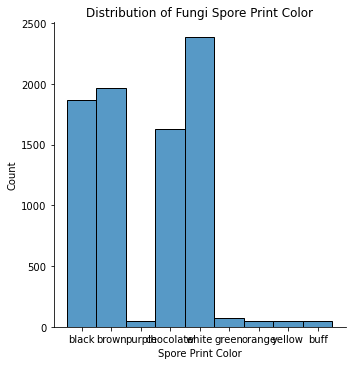

In [22]:
dist_spore = sns.displot(fungi['Spore Print Color'])
dist_spore.set(title = 'Distribution of Fungi Spore Print Color')
dist_spore

##### Observations

By spore color alone, the type of fungi that can be either edible or poisonous can vary. It should be noted that a majority of the **white** fungi in the dataset are poisonous, <u>1,812</u> of them out of 2,388. And **white** is the major occurring value in the column. The most edible spore color fungi is **brown**, with 1,744 out of 1,968 of them.

All of the fungi with **green** spores are poisonous.

It should be noted that the least occurring spore print colors, **buff**, **purple**, **buff**, and **yellow** are fungi that are designated as <u>edible</u>.

In [23]:
fungi['Habitat'].value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: Habitat, dtype: int64

In [24]:
fungi.value_counts(['Edibility', 'Habitat'])

Edibility  Habitat
Edible     woods      1880
           grasses    1408
Poisonous  woods      1268
           paths      1008
           grasses     740
           leaves      592
           urban       272
Edible     meadows     256
           leaves      240
           waste       192
           paths       136
           urban        96
Poisonous  meadows      36
dtype: int64

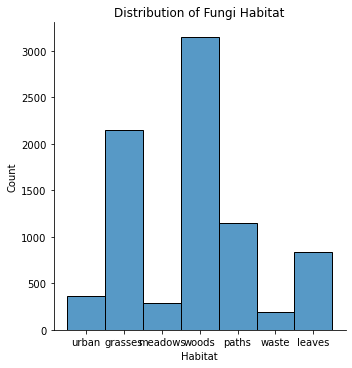

In [25]:
dist_habitat = sns.displot(fungi['Habitat'])
dist_habitat.set(title = 'Distribution of Fungi Habitat')
dist_habitat

##### Observations

The most occurring value in the dataset are the fungi that are habituated in the **woods**, with a value count of 3,418, while fungi found in **grasses** are the second most occurring value, with a count of 2,148. 

Interestingly, the fungi found in **meadows** have a high edible to poisonous ration, being only 256:36. Also, all of the fungi found in **waste** are edible, having a count of 192.

## Correlation Between Edible / Poisonous Fungi, Odor, and Habitat

In [26]:
edible_smell = pd.DataFrame(fungi.value_counts(['Edibility', 'Odor', 'Habitat']))
edible_smell

0
Edibility Odor     Habitat      
Edible    none     woods    1784
                   grasses  1056
Poisonous foul     woods     624
                   paths     624
                   grasses   576
Edible    none     leaves    240
Poisonous fishy    paths     192
          spicy    paths     192
                   leaves    192
          foul     leaves    192
          fishy    woods     192
                   leaves    192
          creosote woods     192
          spicy    woods     192
Edible    none     waste     192
          anise    grasses   176
          almond   grasses   176
Poisonous foul     urban     144
Edible    anise    meadows   128
          almond   meadows   128
Poisonous pungent  grasses   128
                   urban     128
Edible    none     urban      96
          anise    woods      48
                   paths      48
          almond   woods      48
                   paths      48
          none     paths      40
Poisonous none     grasses    36
                   meadows    36
          musty    woods      36
          none     woods      32
                   leaves     16

<AxesSubplot:title={'center':'Correlation Between Fungi Edibility, Odor, and Habitat'}, xlabel='Odor', ylabel='0'>

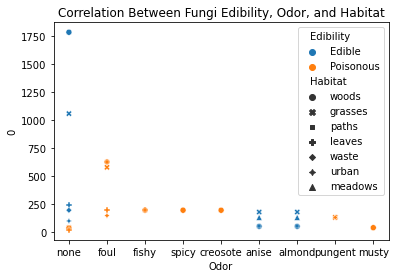

In [27]:
edible_by_odor = sns.scatterplot(data=edible_smell, x='Odor', y=0, hue='Edibility', 
                                 style='Habitat');
edible_by_odor.set(title='Correlation Between Fungi Edibility, Odor, and Habitat')
edible_by_odor

### Observations

Apparently, most of the mushrooms that are **edible** can be found in the **woods** and have **no odor**, 1,784 of them to be precise.

Utilizing either of the columns outside of the "Edibility" column to predict whether a specific mushroom is edible or poisonous may not be guaranteed to be helpful. Trying to identify an edible/poisonous mushroom by a singular trait alone may not be enough, unless a specific trait *definitely* singles them out and confirms their (in)edibility (e.g., fungi with fishy, spicy, or musty odors are all poisonous; all listed mushrooms with green or purple cap colors are edible; etc.). It should benoted that some mushrooms have edible/poisonous look alikes, with only a few traits setting them apart from one another that determines their consumability. Thus, it would be ideal to determine and predict a mushroom's edibility by identifying it through *all* of its characteristics, checking if they do not have any of the characteristics of poisonous look alikes.

## Interesting Concept: What kind of plot would be good for this DataFrame?

Please ignore, this is just a concept and may not be relevant to the assignment.

In [28]:
all_traits = pd.DataFrame(fungi.value_counts(['Edibility', 'Cap Shape', 'Cap Color',
                                              'Odor', 'Spore Print Color', 'Habitat']))
all_traits

0
Edibility Cap Shape Cap Color Odor Spore Print Color Habitat     
Edible    flat      red       none black             woods    144
          convex    brown     none brown             woods    144
          flat      red       none brown             woods    144
          convex    gray      none black             woods    144
                    red       none brown             woods    144
...                                                           ...
Poisonous flat      yellow    none white             leaves     2
Edible    knobbed   brown     none white             woods      2
                                                     paths      2
          convex    brown     none white             woods      2
Poisonous flat      white     none white             leaves     2

[307 rows x 1 columns]